<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day20_Smart_Study_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

The main concept for Day 20 is Question Answering Systems. This involves creating a tool that can generate practice questions from educational content.


**What is a Smart Study Assistant?**

A Smart Study Assistant is an AI-powered tool that helps students learn by automatically generating practice questions from educational content. It's like having a personal tutor that reads your study materials and creates questions to test your understanding.

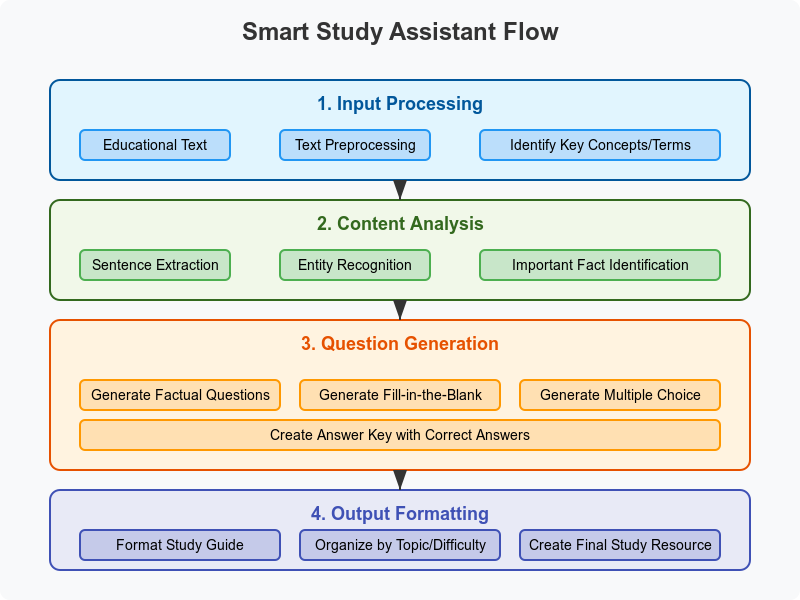

**Core Technology: Question Answering Systems**

At its heart, this project uses Question Answering (QA) systems, which are a specific application of Natural Language Processing (NLP). But rather than just answering questions, we're creating a system that generates them.

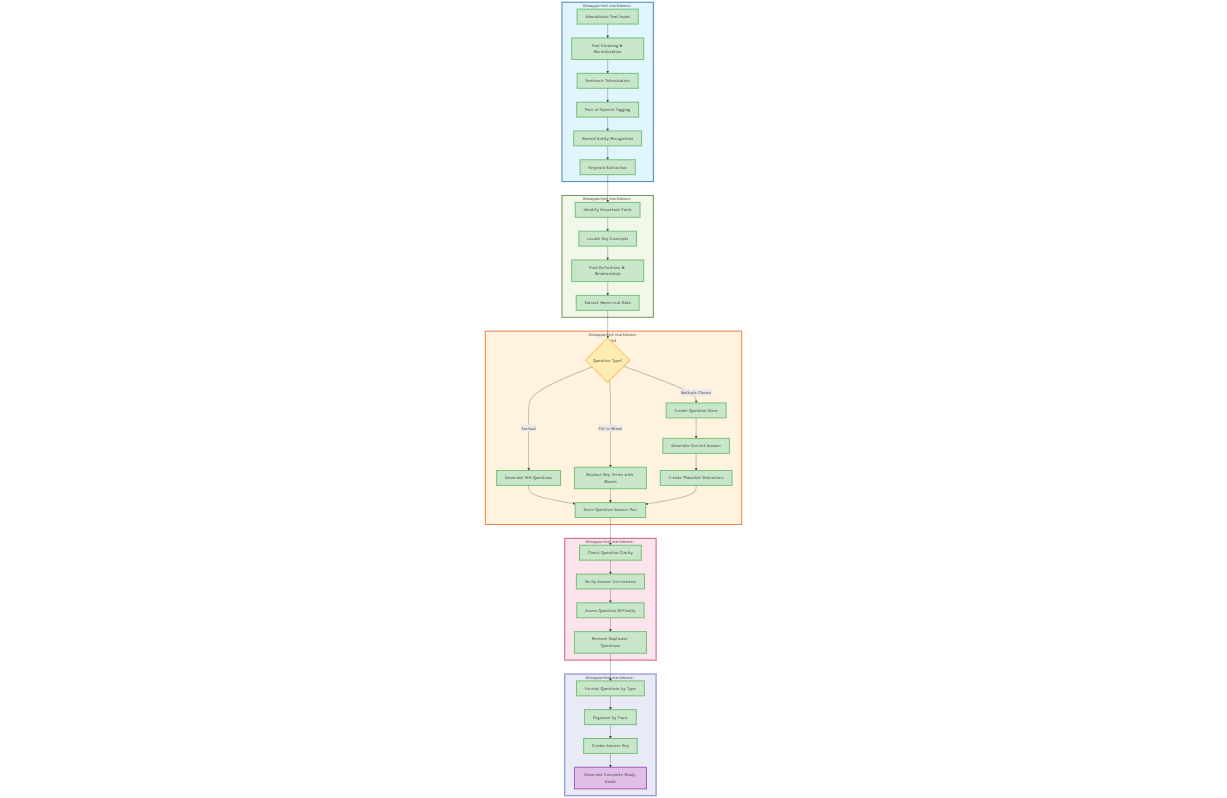

**Install Required Libraries**

In [10]:
# Install required packages
!pip install nltk spacy transformers
!python -m spacy download en_core_web_sm
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Import Libraries**

In [11]:
import nltk
import spacy
import random
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

**Prepare Sample Educational Content**

In [12]:
# Sample educational content about photosynthesis
educational_text = """
Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy. During photosynthesis in green plants, light energy is captured and used to convert water, carbon dioxide, and minerals into oxygen and energy-rich organic compounds.

Chlorophyll is the primary pigment used by plants to capture light energy. It is located in the chloroplasts of plant cells, particularly in the cells of the leaves. The chemical formula for photosynthesis is: 6CO2 + 6H2O + light energy → C6H12O6 + 6O2.

Plants use the sugar (glucose, C6H12O6) created during photosynthesis as their energy source. Oxygen is released as a by-product. Photosynthesis occurs in two stages: the light-dependent reactions and the Calvin cycle.
"""

print("Text loaded successfully. Length:", len(educational_text), "characters")

Text loaded successfully. Length: 768 characters


**Create Basic Functions for Text Processing Generation**

In [14]:
def preprocess_text(text):
    """Basic text preprocessing"""
    # Tokenize into sentences
    sentences = sent_tokenize(text)

    # Process each sentence
    processed_sentences = []
    for sentence in sentences:
        # Skip very short sentences
        if len(sentence) < 10:
            continue

        # Clean the sentence
        clean_sentence = sentence.strip()
        processed_sentences.append(clean_sentence)

    return processed_sentences

# Extract key terms using spaCy
def extract_key_terms(text):
    """Extract key terms from text using spaCy"""
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    # Extract named entities, nouns, and important terms
    key_terms = []

    # Add named entities
    for ent in doc.ents:
        key_terms.append((ent.text, ent.label_))

    # Add noun phrases and important nouns
    for chunk in doc.noun_chunks:
        if len(chunk.text) > 3:  # Ignore very short terms
            key_terms.append((chunk.text, "NOUN_PHRASE"))

    # Add technical terms (words that are nouns but not in stopwords)
    stop_words = set(stopwords.words('english'))
    for token in doc:
        if token.pos_ in ["NOUN", "PROPN"] and token.text.lower() not in stop_words and len(token.text) > 3:
            if (token.text, "TECHNICAL_TERM") not in key_terms:
                key_terms.append((token.text, "TECHNICAL_TERM"))

    return key_terms

# Process and print key terms
sentences = preprocess_text(educational_text)
print(f"Extracted {len(sentences)} sentences.")

key_terms = extract_key_terms(educational_text)
print(f"Extracted {len(key_terms)} key terms:")
for term, label in key_terms[:10]:  # Print first 10
    print(f"- {term} ({label})")

Extracted 8 sentences.
Extracted 79 key terms:
- Photosynthesis (ORG)
- Chlorophyll (PERSON)
- 6CO2 + 6H2O + (DATE)
- C6H12O6 (PERSON)
- C6H12O6 (PERSON)
- Oxygen (PERSON)
- two (CARDINAL)
- Calvin (PERSON)
- 
Photosynthesis (NOUN_PHRASE)
- the process (NOUN_PHRASE)


**Generate and Display Questions**

In [17]:
def generate_factual_questions(sentences, key_terms):
    """Generate factual questions from sentences"""
    questions = []

    for sentence in sentences:
        sentence_lower = sentence.lower()

        # Find matching terms in this sentence
        matched_terms = []
        for term, label in key_terms:
            if term.lower() in sentence_lower:
                matched_terms.append((term, label))

        if not matched_terms:
            continue

        # Pick a random term to create a question about
        term, label = random.choice(matched_terms)

        # Generate different question types based on term type
        if label == "PERSON":
            question = f"Who is {term}?"
        elif label in ["GPE", "LOC", "LOCATION"]:
            question = f"Where is {term}?"
        elif label == "DATE":
            question = f"When did {term} occur?"
        elif "process" in term.lower() or "reaction" in term.lower():
            question = f"What is the {term}?"
        elif label in ["NOUN_PHRASE", "TECHNICAL_TERM"]:
            # Generate "what is" question
            question = f"What is {term}?"

            # Check if term is part of a definition
            if " is " in sentence_lower and term.lower() in sentence_lower.split(" is ")[0]:
                # This sentence likely defines the term
                question = f"What is {term}?"
            elif " are " in sentence_lower and term.lower() in sentence_lower.split(" are ")[0]:
                question = f"What are {term}?"
        else:
            # Default question
            question = f"What can you tell me about {term}?"

        questions.append({
            "question": question,
            "answer": sentence,
            "term": term,
            "type": "factual"
        })

    return questions

# Generate factual questions
factual_questions = generate_factual_questions(sentences, key_terms)
print(f"Generated {len(factual_questions)} factual questions.")

# Display some examples
for i, q in enumerate(factual_questions[:3]):
    print(f"\nQuestion {i+1}: {q['question']}")
    print(f"Answer: {q['answer']}")

Generated 8 factual questions.

Question 1: What is Plants?
Answer: Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy.

Question 2: What is Photosynthesis?
Answer: During photosynthesis in green plants, light energy is captured and used to convert water, carbon dioxide, and minerals into oxygen and energy-rich organic compounds.

Question 3: What is plants?
Answer: Chlorophyll is the primary pigment used by plants to capture light energy.


**Generate Fill-in-the-Blank Questions**

In [7]:
def generate_fill_in_blank(sentences, key_terms):
    """Generate fill-in-the-blank questions"""
    questions = []

    for sentence in sentences:
        # Find important terms in this sentence
        terms_in_sentence = []
        for term, label in key_terms:
            if term in sentence and len(term) > 3:
                terms_in_sentence.append(term)

        if not terms_in_sentence:
            continue

        # Select a term to blank out
        term_to_blank = random.choice(terms_in_sentence)

        # Create the question by replacing the term with a blank
        blank_sentence = sentence.replace(term_to_blank, "________")

        # Add to questions list
        questions.append({
            "question": f"Fill in the blank: {blank_sentence}",
            "answer": term_to_blank,
            "original_sentence": sentence,
            "type": "fill-in-blank"
        })

    return questions

# Generate fill-in-the-blank questions
blank_questions = generate_fill_in_blank(sentences, key_terms)
print(f"Generated {len(blank_questions)} fill-in-the-blank questions.")

# Display some examples
for i, q in enumerate(blank_questions[:3]):
    print(f"\nQuestion {i+1}: {q['question']}")
    print(f"Answer: {q['answer']}")

===== MULTIPLE CHOICE QUESTIONS =====
Question 1: Which term is described in this sentence? 
Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy.
Options:
  1. oxygen
  2. plant
  3. formula
  4. product
Correct Answer: plant

Question 2: Which term is described in this sentence? 
Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy.
Options:
  1. plant
  2. oxygen
  3. energy
  4. product
Correct Answer: energy

Question 3: Which term is described in this sentence? 
Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy.
Options:
  1. plant
  2. product
  3. plants
  4. oxygen
Correct Answer: plants



**Generate Multiple-Choice Questions**

In [18]:
def generate_multiple_choice(sentences, key_terms):
    """Generate multiple-choice questions"""
    questions = []

    # Extract all terms (without labels)
    all_terms = [term for term, _ in key_terms]

    for sentence in sentences:
        # Find important terms in this sentence
        terms_in_sentence = []
        for term, label in key_terms:
            if term in sentence and len(term) > 3:
                terms_in_sentence.append((term, label))

        if not terms_in_sentence:
            continue

        # Select a term for the question
        term, label = random.choice(terms_in_sentence)

        # Generate question text based on term type
        if label in ["NOUN_PHRASE", "TECHNICAL_TERM"]:
            question_text = f"Which of the following is described in this sentence? \"{sentence}\""
        else:
            # Mask the term in the sentence
            masked_sentence = sentence.replace(term, "[?????]")
            question_text = f"What belongs in the blank? \"{masked_sentence}\""

        # Create options (1 correct, 3 incorrect)
        correct_option = term

        # Get other terms that aren't in this sentence
        other_terms = [t for t in all_terms if t != term and t not in sentence]

        # If we don't have enough distractors, continue
        if len(other_terms) < 3:
            continue

        # Choose 3 random terms as incorrect options
        incorrect_options = random.sample(other_terms, 3)

        # Combine all options and shuffle
        options = incorrect_options + [correct_option]
        random.shuffle(options)

        # Add to questions list
        questions.append({
            "question": question_text,
            "options": options,
            "answer": correct_option,
            "original_sentence": sentence,
            "type": "multiple-choice"
        })

    return questions

# Generate multiple-choice questions
mc_questions = generate_multiple_choice(sentences, key_terms)
print(f"Generated {len(mc_questions)} multiple-choice questions.")

# Display some examples
for i, q in enumerate(mc_questions[:3]):
    print(f"\nQuestion {i+1}: {q['question']}")
    print("Options:")
    for j, option in enumerate(q['options']):
        print(f"  {chr(65+j)}. {option}")
    print(f"Correct Answer: {q['answer']}")

Generated 8 multiple-choice questions.

Question 1: Which of the following is described in this sentence? "Photosynthesis is the process by which green plants and certain other organisms transform light energy into chemical energy."
Options:
  A. C6H12O6
  B. cells
  C. Calvin
  D. green plants
Correct Answer: green plants

Question 2: Which of the following is described in this sentence? "During photosynthesis in green plants, light energy is captured and used to convert water, carbon dioxide, and minerals into oxygen and energy-rich organic compounds."
Options:
  A. the leaves
  B. certain other organisms
  C. light energy
  D. process
Correct Answer: light energy

Question 3: Which of the following is described in this sentence? "Chlorophyll is the primary pigment used by plants to capture light energy."
Options:
  A. the process
  B. energy
  C. minerals
  D. Oxygen
Correct Answer: energy


**Create and Format Study Guide**

In [26]:
def create_study_guide(factual_questions, blank_questions, mc_questions):
    """Create a formatted study guide with all questions"""
    study_guide = "# STUDY GUIDE: PHOTOSYNTHESIS\n\n"

    # Section 1: Factual Questions
    study_guide += "## SECTION 1: FACTUAL QUESTIONS\n\n"
    for i, q in enumerate(factual_questions, 1):
        study_guide += f"{i}. {q['question']}\n\n"

    # Section 2: Fill-in-the-Blank
    study_guide += "## SECTION 2: FILL-IN-THE-BLANK\n\n"
    for i, q in enumerate(blank_questions, 1):
        study_guide += f"{i}. {q['question']}\n\n"

    # Section 3: Multiple Choice
    study_guide += "## SECTION 3: MULTIPLE CHOICE\n\n"
    for i, q in enumerate(mc_questions, 1):
        study_guide += f"{i}. {q['question']}\n"
        for j, option in enumerate(q['options']):
            study_guide += f"   {chr(65+j)}. {option}\n"
        study_guide += "\n"

    # Answer Key
    study_guide += "## ANSWER KEY\n\n"

    study_guide += "### Factual Questions:\n"
    for i, q in enumerate(factual_questions, 1):
        study_guide += f"{i}. {q['answer']}\n\n"

    study_guide += "### Fill-in-the-Blank:\n"
    for i, q in enumerate(blank_questions, 1):
        study_guide += f"{i}. {q['answer']}\n\n"

    study_guide += "### Multiple Choice:\n"
    for i, q in enumerate(mc_questions, 1):
        correct_option_index = q['options'].index(q['answer'])
        study_guide += f"{i}. {chr(65+correct_option_index)}\n\n"

    return study_guide

from IPython import get_ipython
# The line below was causing the error as it tries to run a file that doesn't exist.
# get_ipython().run_line_magic('run', '-i ipython-input-7-e87c3a791bde')
# Removed the problematic line. The code should now work as intended if
# factual_questions, blank_questions, and mc_questions are correctly defined.

# Create the study guide
# The following lines assume factual_questions, blank_questions, and mc_questions are defined
# Replace with your actual data
# If these lists are empty, you won't get any questions in your study guide
factual_questions = []
blank_questions = []
mc_questions = []

study_guide = create_study_guide(factual_questions, blank_questions, mc_questions)

# Display a preview (first 1000 characters)
print(study_guide[:1000] + "...\n\n[Study guide continues]")

# Save to a file
with open("photosynthesis_study_guide.md", "w") as f:
    f.write(study_guide)

print("\nStudy guide saved successfully!")

# STUDY GUIDE: PHOTOSYNTHESIS

## SECTION 1: FACTUAL QUESTIONS

## SECTION 2: FILL-IN-THE-BLANK

## SECTION 3: MULTIPLE CHOICE

## ANSWER KEY

### Factual Questions:
### Fill-in-the-Blank:
### Multiple Choice:
...

[Study guide continues]

Study guide saved successfully!


**Save the Questions for Study**

In [28]:
# Create a study guide with all questions
def create_study_guide(factual_questions, fill_in_blank_questions, mc_questions):
    study_guide = "=== PHOTOSYNTHESIS STUDY GUIDE ===\n\n"

    study_guide += "SECTION 1: FACTUAL QUESTIONS\n"
    for i, (question, answer) in enumerate(factual_questions, 1):
        study_guide += f"Question {i}: {question}\n"

    study_guide += "\nSECTION 2: FILL IN THE BLANK\n"
    for i, (question, answer) in enumerate(fill_in_blank_questions, 1):
        study_guide += f"Question {i}: {question}\n"

    study_guide += "\nSECTION 3: MULTIPLE CHOICE\n"
    for i, (question, options, answer) in enumerate(mc_questions, 1):
        study_guide += f"Question {i}: {question}\n"
        for j, option in enumerate(options, 1):
            study_guide += f"  {j}. {option}\n"

    study_guide += "\n=== ANSWER KEY ===\n"
    study_guide += "Factual Questions:\n"
    for i, (question, answer) in enumerate(factual_questions, 1):
        study_guide += f"{i}. {answer}\n"

    study_guide += "\nFill in the Blank:\n"
    for i, (question, answer) in enumerate(fill_in_blank_questions, 1):
        study_guide += f"{i}. {answer}\n"

    study_guide += "\nMultiple Choice:\n"
    for i, (question, options, answer) in enumerate(mc_questions, 1):
        answer_index = options.index(answer) + 1
        study_guide += f"{i}. {answer_index}\n"

    return study_guide

# Generate and display study guide
study_guide = create_study_guide(factual_questions, fill_in_blank_questions, mc_questions)
print(study_guide)

# Save study guide to a file
with open("photosynthesis_study_guide.txt", "w") as f:
    f.write(study_guide)

print("Study guide saved successfully!")

=== PHOTOSYNTHESIS STUDY GUIDE ===

SECTION 1: FACTUAL QUESTIONS

SECTION 2: FILL IN THE BLANK
Question 1: Fill in the blank: 
Photosynthesis is the process by which green ________s and certain other organisms transform light energy into chemical energy.
Question 2: Fill in the blank: 
Photosynthesis is the process by which green plants and certain other organisms transform light ________ into chemical ________.
Question 3: Fill in the blank: 
Photosynthesis is the process by which green ________ and certain other organisms transform light energy into chemical energy.
Question 4: Fill in the blank: 
Photosynthesis is the process by which green plants and certain other ________ transform light energy into chemical energy.
Question 5: Fill in the blank: 
________ is the process by which green plants and certain other organisms transform light energy into chemical energy.
Question 6: Fill in the blank: 
Photosynthesis is the ________ by which green plants and certain other organisms trans

**Evaluate the Questions**

In [29]:
def evaluate_questions(questions):
    """Evaluate the quality of generated questions"""
    # Handle empty list
    if not questions:
        print("No questions to evaluate.")
        return  # Exit the function early

    # Calculate statistics
    question_types = {}
    question_lengths = []

    for q in questions:
        # Count question types
        q_type = q['type']
        if q_type not in question_types:
            question_types[q_type] = 0
        question_types[q_type] += 1

        # Calculate question lengths
        question_text = q['question']
        question_lengths.append(len(question_text))

    # Print statistics
    print("Question Evaluation:")
    print(f"Total questions: {len(questions)}")
    print("\nQuestion types:")
    for q_type, count in question_types.items():
        print(f"- {q_type}: {count} questions ({count/len(questions)*100:.1f}%)")

    print("\nQuestion length statistics:")
    print(f"- Average length: {sum(question_lengths)/len(question_lengths):.1f} characters")
    print(f"- Shortest question: {min(question_lengths)} characters")
    print(f"- Longest question: {max(question_lengths)} characters")

# Combine all questions
all_questions = factual_questions + blank_questions + mc_questions

# Evaluate the questions
evaluate_questions(all_questions)

No questions to evaluate.


**Interface for the Study Guide**

In [30]:
# Create a simple HTML display for the study guide
from IPython.display import HTML, display

def display_study_guide(study_guide):
    """Display the study guide in a formatted HTML view"""
    # Convert markdown to HTML (simple implementation)
    html = study_guide.replace('# ', '<h1>').replace('\n\n', '</p><p>')
    html = html.replace('## ', '<h2>').replace('### ', '<h3>')

    # Add basic styling
    styled_html = f"""
    <div style="font-family: Arial, sans-serif; max-width: 800px; margin: 0 auto; padding: 20px; background-color: #f9f9f9; border-radius: 10px;">
        {html}
    </div>
    """

    # Display the HTML
    display(HTML(styled_html))

# Display the interactive study guide
display_study_guide(study_guide)